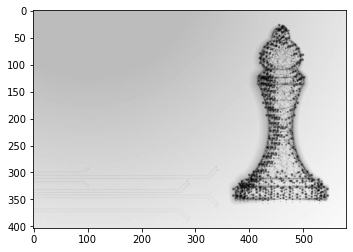

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/home/avinandan/Documents/RoManOV_Automation-master/Resources/Chapters/15-cnn-keras/images"
CATEGORIES = ["queen","bishop","rook","knight","pawn","king"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [6]:
print(img_array) 

[[188 188 188 ... 229 229 229]
 [188 188 188 ... 229 229 229]
 [188 188 188 ... 229 229 229]
 ...
 [230 230 230 ... 250 250 250]
 [230 230 230 ... 250 250 250]
 [230 230 230 ... 250 250 250]]


In [7]:
print(img_array.shape)

(403, 580)


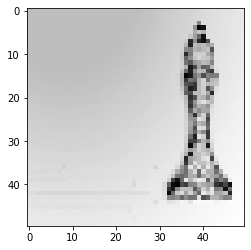

In [11]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  
        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num]) 
            except Exception as e:  
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

In [14]:
print(len(training_data))

1437


In [15]:
import random

random.shuffle(training_data)

In [16]:
for sample in training_data[:10]:
    print(sample[1])

0
5
4
2
5
4
4
2
5
2


In [17]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [254]
   [249]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[254]
   [254]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[246]
   [254]
   [254]
   ...
   [255]
   [255]
   [255]]

  [[253]
   [253]
   [254]
   ...
   [255]
   [255]
   [255]]]]


In [18]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)